In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score #Confusion matrix 수업 때 진행할 예정 
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time
import matplotlib.pyplot as plt
import os

In [2]:
pwd

'/home/sh/lab/etritf/jw_data'

# 2018년도 이진분류
- RandomForest모델      
    - sleep_Score 기준: 0.527
    - sleepProblem기준: 0.583
- XGB 모델
    - sleep_Score 기준: 0.472
    - deepsleepduration기준: 0.569

,sleep,personal_care,work,study,household,recreation_media,entertainment,outdoor_act,hobby,recreation_etc,...,sleep.1,sleepProblem,dream,amCondition,amEmotion,total_CaffAmount,sleep_score,total_sleep_time,time_in_bed,sleep_classes
0,0,0,0,1,0,0,0,0,0,1,...,3.0,3.0,2.0,4.0,5.0,-1.0,0.003982,22800,1.101316,0
1,0,0,0,1,0,0,0,0,0,1,...,3.0,0.0,4.0,3.0,4.0,-1.0,0.004380,21000,1.087143,1
2,0,1,0,1,1,0,0,0,0,0,...,4.0,6.0,4.0,2.0,2.0,-1.0,0.004517,19590,1.130168,1
3,0,0,0,1,0,0,0,0,0,0,...,3.0,0.0,4.0,1.0,5.0,2.0,0.004021,22080,1.126359,0
4,0,0,1,0,0,0,0,0,0,1,...,4.0,0.0,4.0,1.0,2.0,-1.0,0.005168,17880,1.082215,1


sleep_classes
1    109
0    108
dtype: int64

1. time_in_bed (0.134832)
2. pmStress (0.069305)
3. amEmotion (0.068301)
4. sleepProblem (0.067194)
5. sleep.1 (0.050619)
6. pmEmotion (0.049722)
7. recreation_etc (0.042786)
8. dream (0.040884)
9. dinner (0.040602)
10. amCondition (0.040178)
11. lateSnack (0.036099)
12. lunch (0.033572)
13. breakfast (0.030908)
14. pmCaffAmount (0.027142)
15. travel (0.027020)
16. amCaffAmount (0.024583)
17. meal (0.023938)
18. recreation_media (0.022117)
19. ifUnusual (0.021585)
20. hobby (0.019498)
21. work (0.019323)
22. study (0.018522)
23. total_CaffAmount (0.017615)
24. aAmount (0.015627)
25. personal_care (0.013653)
26. communitiy_interaction (0.012811)
27. household (0.011907)
28. socialising (0.010112)
29. outdoor_act (0.007551)
30. entertainment (0.001842)
31. sleep (0.000150)


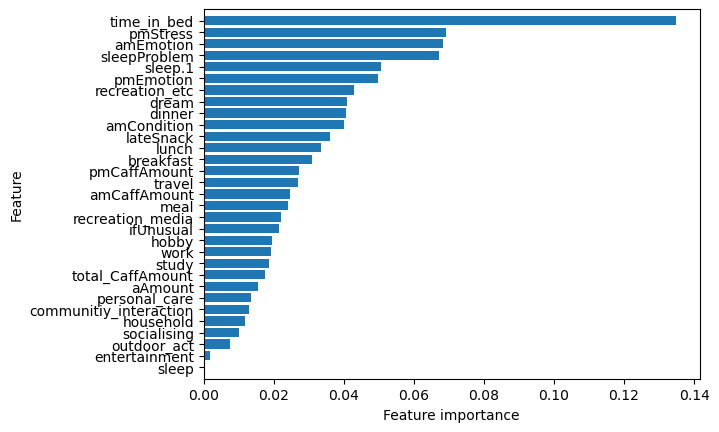

---------------------------------
정확도 :  0.5277777777777778


In [20]:
data18 = pd.read_csv('data/total18.csv').drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)
data18=data18.drop(['waso', 'wakeupcount','aal','movement_index','fragmentation_index', 'sleep_frag_index', 'amCaffeine','pmCaffeine','alcohol','inputDt','date','date_m','startDt', 'endDt'],axis=1)
for x in ['time_in_bed','sleep_score']:
    data18[x]=data18[x]/data18['total_sleep_time']
data18['sleep_classes'] = data18['sleep_score'].apply(lambda x: 1 if x>=0.004045307441314554 else 0)
display(data18.head())
display(data18.value_counts('sleep_classes'))
    
col=data18.columns[:-1]
X=data18[col]
X=X.drop(['sleep_score','total_sleep_time'],axis=1)
y=data18['sleep_classes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#from imblearn.over_sampling import SMOTE

#smote = SMOTE(random_state=42)
#X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

#변수 중요도
model = RandomForestClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
n_features = X_train.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features)[::-1],X.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)

sleep_classes
1    123
0     94
dtype: int64

1. time_in_bed (0.135862)
2. sleep.1 (0.076372)
3. amEmotion (0.059096)
4. pmStress (0.055263)
5. dream (0.054247)
6. pmEmotion (0.054167)
7. breakfast (0.052259)
8. amCondition (0.049146)
9. lunch (0.044561)
10. lateSnack (0.044245)
11. dinner (0.040647)
12. amCaffAmount (0.031853)
13. household (0.031110)
14. pmCaffAmount (0.029721)
15. meal (0.024667)
16. work (0.023621)
17. recreation_etc (0.022425)
18. total_CaffAmount (0.021094)
19. study (0.019631)
20. recreation_media (0.018882)
21. personal_care (0.017177)
22. travel (0.016344)
23. ifUnusual (0.015858)
24. aAmount (0.015728)
25. hobby (0.012233)
26. entertainment (0.009186)
27. outdoor_act (0.008173)
28. socialising (0.006568)
29. communitiy_interaction (0.006537)
30. sleep (0.003324)


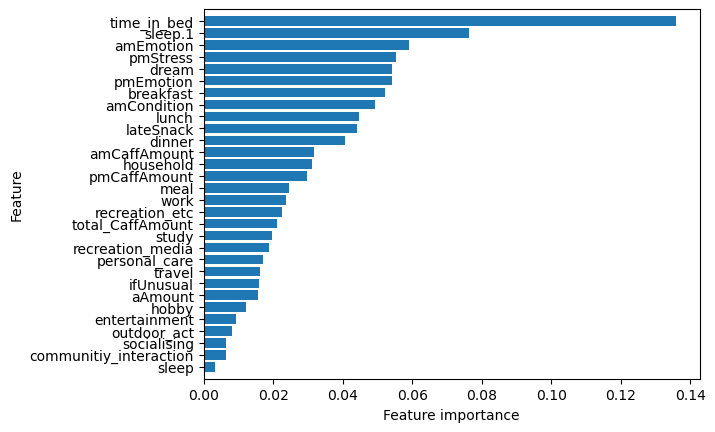

---------------------------------
정확도 :  0.5833333333333334


In [24]:
data18 = pd.read_csv('data/total18.csv').drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)
data18=data18.drop(['waso', 'wakeupcount','aal','movement_index','fragmentation_index', 'sleep_frag_index', 'amCaffeine','pmCaffeine','alcohol','inputDt','date','date_m','startDt', 'endDt'],axis=1)
for x in ['time_in_bed','sleep_score']:
    data18[x]=data18[x]/data18['total_sleep_time']
data18['sleep_classes'] = data18['sleepProblem'].apply(lambda x: 1 if x>=1 else 0)
display(data18.value_counts('sleep_classes'))
    
col=data18.columns[:-1]
X=data18[col]
X=X.drop(['sleep_score','total_sleep_time','sleepProblem'],axis=1)
y=data18['sleep_classes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = RandomForestClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
n_features = X_train.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features)[::-1],X_train.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)

,sleep,personal_care,work,study,household,recreation_media,entertainment,outdoor_act,hobby,recreation_etc,...,sleep.1,sleepProblem,dream,amCondition,amEmotion,total_CaffAmount,sleep_score,total_sleep_time,time_in_bed,sleep_classes
0,0,0,0,1,0,0,0,0,0,1,...,3.0,3.0,2.0,4.0,5.0,-1.0,0.003982,22800,1.101316,0
1,0,0,0,1,0,0,0,0,0,1,...,3.0,0.0,4.0,3.0,4.0,-1.0,0.004380,21000,1.087143,1
2,0,1,0,1,1,0,0,0,0,0,...,4.0,6.0,4.0,2.0,2.0,-1.0,0.004517,19590,1.130168,1
3,0,0,0,1,0,0,0,0,0,0,...,3.0,0.0,4.0,1.0,5.0,2.0,0.004021,22080,1.126359,0
4,0,0,1,0,0,0,0,0,0,1,...,4.0,0.0,4.0,1.0,2.0,-1.0,0.005168,17880,1.082215,1


sleep_classes
1    109
0    108
dtype: int64

1. hobby (0.081608)
2. sleep.1 (0.076096)
3. dream (0.073239)
4. amEmotion (0.060693)
5. pmCaffAmount (0.045491)
6. recreation_etc (0.045238)
7. sleepProblem (0.043698)
8. amCondition (0.039480)
9. amCaffAmount (0.038315)
10. ifUnusual (0.035630)
11. communitiy_interaction (0.035601)
12. pmStress (0.034904)
13. pmEmotion (0.034301)
14. travel (0.034087)
15. aAmount (0.031323)
16. time_in_bed (0.030422)
17. household (0.029918)
18. meal (0.029788)
19. dinner (0.028915)
20. breakfast (0.028154)
21. work (0.026943)
22. study (0.025164)
23. recreation_media (0.025145)
24. personal_care (0.021349)
25. lateSnack (0.017847)
26. lunch (0.015416)
27. outdoor_act (0.005737)
28. total_CaffAmount (0.005498)
29. socialising (0.000000)
30. entertainment (0.000000)
31. sleep (0.000000)


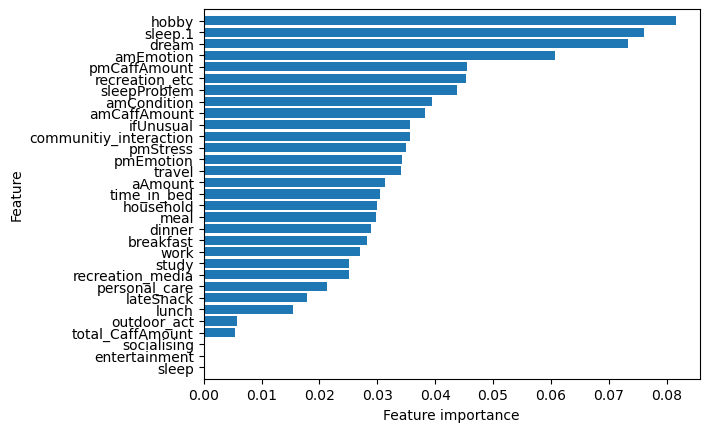

---------------------------------
정확도 :  0.4722222222222222


In [25]:
data18 = pd.read_csv('data/total18.csv').drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)
data18=data18.drop(['waso', 'wakeupcount','aal','movement_index','fragmentation_index', 'sleep_frag_index', 'amCaffeine','pmCaffeine','alcohol','inputDt','date','date_m','startDt', 'endDt'],axis=1)
for x in ['time_in_bed','sleep_score']:
    data18[x]=data18[x]/data18['total_sleep_time']
data18['sleep_classes'] = data18['sleep_score'].apply(lambda x: 1 if x>=0.004045307441314554 else 0)
display(data18.head())
display(data18.value_counts('sleep_classes'))
    
col=data18.columns[:-1]
X=data18[col]
X=X.drop(['sleep_score','total_sleep_time'],axis=1)
y=data18['sleep_classes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#변수 중요도
model = XGBClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
n_features = X_train.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features)[::-1],X.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)

sleep_classes
1    123
0     94
dtype: int64

1. sleep.1 (0.068097)
2. dream (0.065882)
3. amCondition (0.064268)
4. pmEmotion (0.061612)
5. dinner (0.055370)
6. pmCaffAmount (0.047995)
7. amEmotion (0.045682)
8. meal (0.044327)
9. study (0.042769)
10. work (0.042269)
11. household (0.041717)
12. total_CaffAmount (0.040905)
13. time_in_bed (0.040478)
14. breakfast (0.040464)
15. amCaffAmount (0.036587)
16. recreation_media (0.031130)
17. lateSnack (0.030469)
18. personal_care (0.030410)
19. pmStress (0.028377)
20. aAmount (0.028133)
21. recreation_etc (0.027832)
22. lunch (0.026524)
23. travel (0.025834)
24. ifUnusual (0.023050)
25. socialising (0.009818)
26. hobby (0.000000)
27. entertainment (0.000000)
28. outdoor_act (0.000000)
29. communitiy_interaction (0.000000)
30. sleep (0.000000)


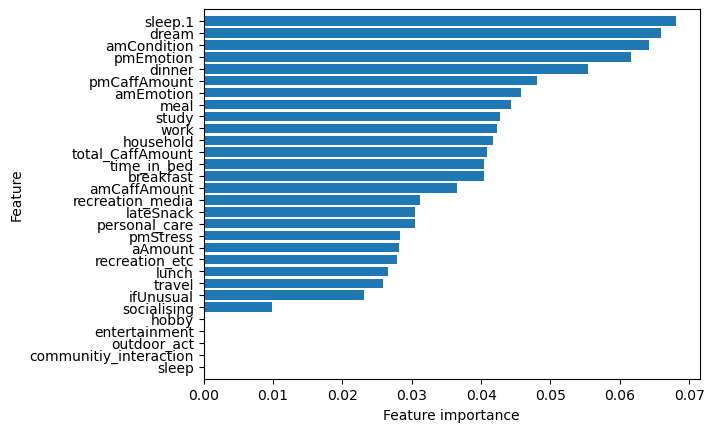

---------------------------------
정확도 :  0.5694444444444444


In [26]:
data18 = pd.read_csv('data/total18.csv').drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)
data18=data18.drop(['waso', 'wakeupcount','aal','movement_index','fragmentation_index', 'sleep_frag_index', 'amCaffeine','pmCaffeine','alcohol','inputDt','date','date_m','startDt', 'endDt'],axis=1)
for x in ['time_in_bed','sleep_score']:
    data18[x]=data18[x]/data18['total_sleep_time']
data18['sleep_classes'] = data18['sleepProblem'].apply(lambda x: 1 if x>=1 else 0)
display(data18.value_counts('sleep_classes'))
    
col=data18.columns[:-1]
X=data18[col]
X=X.drop(['sleep_score','total_sleep_time','sleepProblem'],axis=1)
y=data18['sleep_classes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = XGBClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
n_features = X_train.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features)[::-1],X_train.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)

# 2019년도 이진분류
- RandomForest모델      
    - sleep_Score 기준: 0.901
    - deepsleepduration기준: 1.0
- XGB 모델
    - sleep_Score 기준: 0.887
    - deepsleepduration기준: 1.0

,sleep,personal_care,work,study,household,recreation_media,entertainment,outdoor_act,hobby,recreation_etc,...,sleep_score,total_sleep_time,time_in_bed,waso,wakeupcount,aal,movement_index,fragmentation_index,sleep_frag_index,sleep_classes
0,0,0,0,1,0,0,0,0,0,1,...,0.003081,26760,1.213004,0.213004,0.000112,0.001183,6.412,25.0,31.412,0
1,0,0,0,1,1,0,0,0,0,1,...,0.002710,36120,1.021595,0.021595,0.000055,0.000180,12.060,0.0,12.060,0
2,0,1,1,0,0,0,0,0,0,1,...,0.005869,16440,1.036496,0.036496,0.000487,0.000076,4.930,0.0,4.930,1
3,0,0,0,1,0,0,0,0,0,0,...,0.002981,32880,1.020073,0.020073,0.000122,0.000084,1.431,0.0,1.431,0
4,1,0,1,0,0,0,0,0,0,1,...,0.003931,25320,1.004739,0.004739,0.000079,0.000039,2.358,0.0,2.358,1


sleep_classes
1    110
0    104
dtype: int64

1. wakeupcount (0.177365)
2. time_in_bed (0.164881)
3. movement_index (0.160033)
4. aal (0.116409)
5. waso (0.110681)
6. sleep_frag_index (0.053156)
7. fragmentation_index (0.031396)
8. sleepProblem (0.021528)
9. pmStress (0.014863)
10. lunch (0.012805)
11. amCondition (0.010220)
12. dream (0.009612)
13. amEmotion (0.009517)
14. breakfast (0.009095)
15. dinner (0.008373)
16. meal (0.008209)
17. personal_care (0.007545)
18. study (0.007485)
19. sleep.1 (0.007472)
20. recreation_etc (0.005458)
21. work (0.005309)
22. pmEmotion (0.005301)
23. travel (0.004496)
24. lateSnack (0.004345)
25. recreation_media (0.004336)
26. socialising (0.004206)
27. ifUnusual (0.003263)
28. amCaffAmount (0.003115)
29. aAmount (0.002948)
30. pmCaffAmount (0.002695)
31. household (0.002560)
32. hobby (0.002329)
33. sleep (0.002299)
34. total_CaffAmount (0.002249)
35. outdoor_act (0.002085)
36. entertainment (0.001587)
37. communitiy_interaction (0.000775)


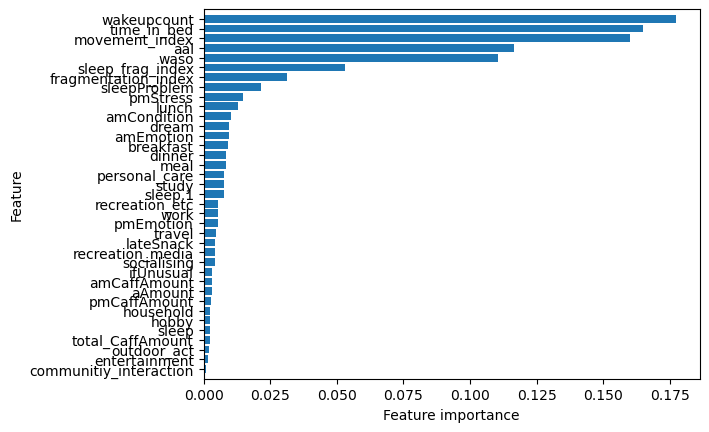

---------------------------------
정확도 :  0.9014084507042254


In [28]:
data19=pd.read_csv('data/total19.csv').drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)
data19=data19.drop(['amCaffeine','pmCaffeine','alcohol','inputDt','date','date_m','startDt', 'endDt'],axis=1)
for x in ['waso','wakeupcount','aal','time_in_bed','sleep_score']:
    data19[x]=data19[x]/data19['total_sleep_time']
data19['sleep_classes'] = data19['sleep_score'].apply(lambda x: 1 if x>=0.0032971272770871973 else 0)
display(data19.head())
display(data19.value_counts('sleep_classes'))
    
col=data19.columns[:-1]
X=data19[col]
X=X.drop(['sleep_score','total_sleep_time'],axis=1)
y=data19['sleep_classes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = RandomForestClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
n_features = X_train.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features)[::-1],X.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)

sleep_classes
1    112
0    102
dtype: int64

,sleep,personal_care,work,study,household,recreation_media,entertainment,outdoor_act,hobby,recreation_etc,...,sleep_score,total_sleep_time,time_in_bed,waso,wakeupcount,aal,movement_index,fragmentation_index,sleep_frag_index,sleep_classes
0,0,0,0,1,0,0,0,0,0,1,...,82.44,26760,1.213004,0.213004,0.000112,0.001183,6.412,25.0,31.412,1
1,0,0,0,1,1,0,0,0,0,1,...,97.89,36120,1.021595,0.021595,0.000055,0.000180,12.060,0.0,12.060,0
2,0,1,1,0,0,0,0,0,0,1,...,96.48,16440,1.036496,0.036496,0.000487,0.000076,4.930,0.0,4.930,0
3,0,0,0,1,0,0,0,0,0,0,...,98.03,32880,1.020073,0.020073,0.000122,0.000084,1.431,0.0,1.431,0
4,1,0,1,0,0,0,0,0,0,1,...,99.53,25320,1.004739,0.004739,0.000079,0.000039,2.358,0.0,2.358,0


1. time_in_bed (0.301053)
2. wakeupcount (0.254191)
3. movement_index (0.178890)
4. sleep_frag_index (0.091211)
5. aal (0.057736)
6. fragmentation_index (0.056598)
7. pmEmotion (0.005459)
8. dinner (0.004409)
9. sleepProblem (0.004246)
10. recreation_etc (0.003815)
11. sleep.1 (0.003626)
12. pmStress (0.003388)
13. dream (0.003062)
14. amCondition (0.003003)
15. travel (0.002995)
16. breakfast (0.002859)
17. amEmotion (0.002847)
18. study (0.002780)
19. personal_care (0.002266)
20. lunch (0.002043)
21. socialising (0.002026)
22. household (0.001753)
23. meal (0.001552)
24. lateSnack (0.001485)
25. ifUnusual (0.001390)
26. pmCaffAmount (0.001254)
27. recreation_media (0.000757)
28. outdoor_act (0.000629)
29. aAmount (0.000629)
30. sleep (0.000549)
31. total_CaffAmount (0.000491)
32. hobby (0.000441)
33. amCaffAmount (0.000313)
34. work (0.000231)
35. entertainment (0.000023)
36. communitiy_interaction (0.000000)


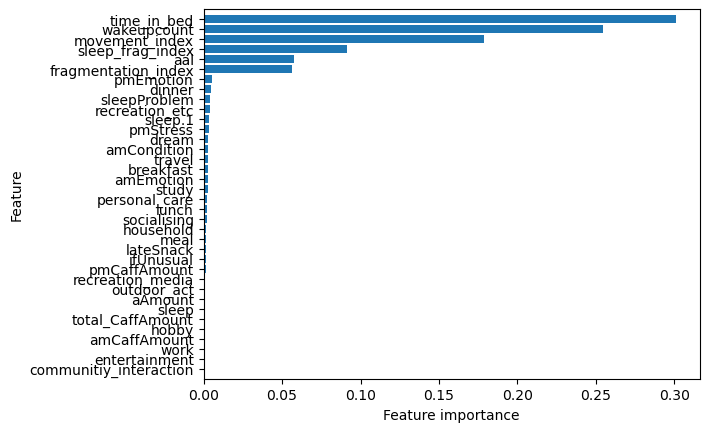

---------------------------------
정확도 :  1.0


In [29]:
data19=pd.read_csv('data/total19.csv').drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)
data19=data19.drop(['amCaffeine','pmCaffeine','alcohol','inputDt','date','date_m','startDt', 'endDt'],axis=1)
for x in ['time_in_bed','aal','wakeupcount','waso']:
    data19[x]=data19[x]/data19['total_sleep_time']
data19['sleep_classes'] = data19['waso'].apply(lambda x: 1 if x>=0.03683036861197604 else 0)
display(data19.value_counts('sleep_classes'))
display(data19.head())
    
col=data19.columns[:-1]
X=data19[col]
X=X.drop(['sleep_score','waso','total_sleep_time'],axis=1)
y=data19['sleep_classes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = RandomForestClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
n_features = X_train.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features)[::-1],X.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)

,sleep,personal_care,work,study,household,recreation_media,entertainment,outdoor_act,hobby,recreation_etc,...,sleep_score,total_sleep_time,time_in_bed,waso,wakeupcount,aal,movement_index,fragmentation_index,sleep_frag_index,sleep_classes
0,0,0,0,1,0,0,0,0,0,1,...,0.003081,26760,1.213004,0.213004,0.000112,0.001183,6.412,25.0,31.412,0
1,0,0,0,1,1,0,0,0,0,1,...,0.002710,36120,1.021595,0.021595,0.000055,0.000180,12.060,0.0,12.060,0
2,0,1,1,0,0,0,0,0,0,1,...,0.005869,16440,1.036496,0.036496,0.000487,0.000076,4.930,0.0,4.930,1
3,0,0,0,1,0,0,0,0,0,0,...,0.002981,32880,1.020073,0.020073,0.000122,0.000084,1.431,0.0,1.431,0
4,1,0,1,0,0,0,0,0,0,1,...,0.003931,25320,1.004739,0.004739,0.000079,0.000039,2.358,0.0,2.358,1


sleep_classes
1    110
0    104
dtype: int64

1. movement_index (0.213244)
2. sleep_frag_index (0.160176)
3. wakeupcount (0.083023)
4. fragmentation_index (0.070420)
5. aal (0.051209)
6. sleep.1 (0.045846)
7. personal_care (0.042245)
8. pmEmotion (0.039757)
9. time_in_bed (0.038267)
10. meal (0.032926)
11. study (0.032855)
12. ifUnusual (0.031845)
13. dream (0.023509)
14. amCondition (0.020670)
15. pmStress (0.020597)
16. recreation_etc (0.019832)
17. lunch (0.018125)
18. amEmotion (0.016138)
19. dinner (0.014988)
20. sleepProblem (0.012736)
21. breakfast (0.011594)
22. outdoor_act (0.000000)
23. waso (0.000000)
24. work (0.000000)
25. total_CaffAmount (0.000000)
26. household (0.000000)
27. recreation_media (0.000000)
28. entertainment (0.000000)
29. hobby (0.000000)
30. amCaffAmount (0.000000)
31. lateSnack (0.000000)
32. communitiy_interaction (0.000000)
33. travel (0.000000)
34. socialising (0.000000)
35. aAmount (0.000000)
36. pmCaffAmount (0.000000)
37. sleep (0.000000)


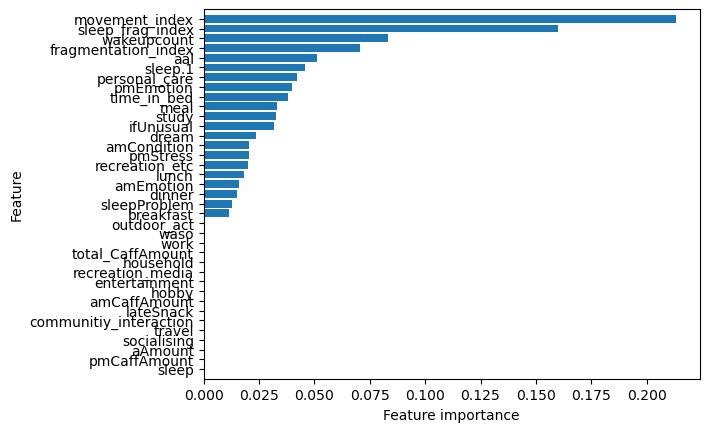

---------------------------------
정확도 :  0.8873239436619719


In [30]:
data19=pd.read_csv('data/total19.csv').drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)
data19=data19.drop(['amCaffeine','pmCaffeine','alcohol','inputDt','date','date_m','startDt', 'endDt'],axis=1)
for x in ['waso','wakeupcount','aal','time_in_bed','sleep_score']:
    data19[x]=data19[x]/data19['total_sleep_time']
data19['sleep_classes'] = data19['sleep_score'].apply(lambda x: 1 if x>=0.0032971272770871973 else 0)
display(data19.head())
display(data19.value_counts('sleep_classes'))
    
col=data19.columns[:-1]
X=data19[col]
X=X.drop(['sleep_score','total_sleep_time'],axis=1)
y=data19['sleep_classes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = XGBClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
n_features = X_train.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features)[::-1],X.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)

sleep_classes
1    112
0    102
dtype: int64

,sleep,personal_care,work,study,household,recreation_media,entertainment,outdoor_act,hobby,recreation_etc,...,sleep_score,total_sleep_time,time_in_bed,waso,wakeupcount,aal,movement_index,fragmentation_index,sleep_frag_index,sleep_classes
0,0,0,0,1,0,0,0,0,0,1,...,82.44,26760,1.213004,0.213004,0.000112,0.001183,6.412,25.0,31.412,1
1,0,0,0,1,1,0,0,0,0,1,...,97.89,36120,1.021595,0.021595,0.000055,0.000180,12.060,0.0,12.060,0
2,0,1,1,0,0,0,0,0,0,1,...,96.48,16440,1.036496,0.036496,0.000487,0.000076,4.930,0.0,4.930,0
3,0,0,0,1,0,0,0,0,0,0,...,98.03,32880,1.020073,0.020073,0.000122,0.000084,1.431,0.0,1.431,0
4,1,0,1,0,0,0,0,0,0,1,...,99.53,25320,1.004739,0.004739,0.000079,0.000039,2.358,0.0,2.358,0


1. time_in_bed (1.000000)
2. sleep_frag_index (0.000000)
3. hobby (0.000000)
4. pmEmotion (0.000000)
5. socialising (0.000000)
6. meal (0.000000)
7. travel (0.000000)
8. communitiy_interaction (0.000000)
9. recreation_etc (0.000000)
10. outdoor_act (0.000000)
11. ifUnusual (0.000000)
12. entertainment (0.000000)
13. recreation_media (0.000000)
14. household (0.000000)
15. study (0.000000)
16. work (0.000000)
17. personal_care (0.000000)
18. pmStress (0.000000)
19. breakfast (0.000000)
20. fragmentation_index (0.000000)
21. dream (0.000000)
22. movement_index (0.000000)
23. aal (0.000000)
24. wakeupcount (0.000000)
25. total_CaffAmount (0.000000)
26. amEmotion (0.000000)
27. amCondition (0.000000)
28. sleepProblem (0.000000)
29. lunch (0.000000)
30. sleep.1 (0.000000)
31. aAmount (0.000000)
32. pmCaffAmount (0.000000)
33. amCaffAmount (0.000000)
34. lateSnack (0.000000)
35. dinner (0.000000)
36. sleep (0.000000)


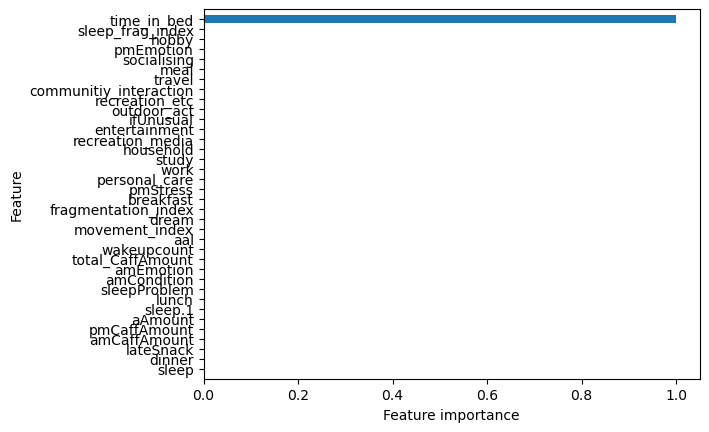

---------------------------------
정확도 :  1.0


In [31]:
data19=pd.read_csv('data/total19.csv').drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)
data19=data19.drop(['amCaffeine','pmCaffeine','alcohol','inputDt','date','date_m','startDt', 'endDt'],axis=1)
for x in ['time_in_bed','aal','wakeupcount','waso']:
    data19[x]=data19[x]/data19['total_sleep_time']
data19['sleep_classes'] = data19['waso'].apply(lambda x: 1 if x>=0.03683036861197604 else 0)
display(data19.value_counts('sleep_classes'))
display(data19.head())
    
col=data19.columns[:-1]
X=data19[col]
X=X.drop(['sleep_score','waso','total_sleep_time'],axis=1)
y=data19['sleep_classes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = XGBClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
n_features = X_train.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features)[::-1],X.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)

# 2020년도 이진분류
- RandomForest모델      
    - sleep_Score 기준: 0.754
    - deepsleepduration기준: 0.897
- XGB 모델
    - sleep_Score 기준: 0.771
    - deepsleepduration기준: 0.942

sleep_classes
1    276
0    253
dtype: int64

1. breathing_disturbances_intensity (0.098127)
2. wakeupduration (0.096092)
3. remsleepduration (0.090831)
4. wakeupcount (0.085347)
5. durationtosleep (0.079273)
6. lightsleepduration (0.062469)
7. deepsleepduration (0.062227)
8. hr_max (0.043887)
9. rr_max (0.037085)
10. hr_average (0.034368)
11. hr_min (0.033496)
12. snoring (0.032223)
13. snoringepisodecount (0.031023)
14. rr_min (0.028167)
15. rr_average (0.026501)
16. durationtowakeup (0.014169)
17. 725 (0.007370)
18. 132 (0.006932)
19. 722 (0.006828)
20. 121 (0.006396)
21. 211 (0.006106)
22. 724 (0.006055)
23. 82 (0.005874)
24. 793 (0.005350)
25. 92 (0.005305)
26. 791 (0.005085)
27. 84 (0.004659)
28. 43 (0.004494)
29. 87 (0.004024)
30. 41 (0.003864)
31. 756 (0.003830)
32. 711 (0.003810)
33. 212 (0.003634)
34. 51 (0.003611)
35. 81 (0.003419)
36. 712 (0.003305)
37. 133 (0.003302)
38. 122 (0.003128)
39. 91 (0.002857)
40. 723 (0.002855)
41. 83 (0.002273)
42. 313 (0.002184)
43. 213 (0.001962)
44. 746 (0.001937)
45. 751 (0.001922)
46.

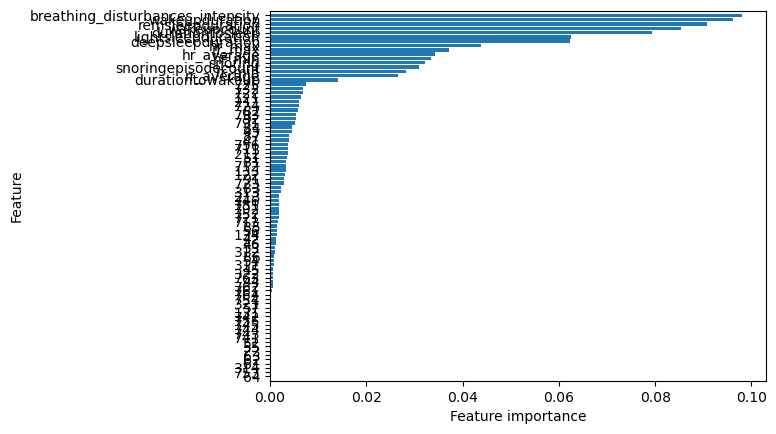

---------------------------------
정확도 :  0.7542857142857143


In [15]:
data=pd.read_csv('2020action-sleep.csv')
data=data.drop('Unnamed: 0',axis=1)
data['total_sleep_time']=data['lightsleepduration']+data['deepsleepduration']+data['remsleepduration']
for x in ['wakeupduration','lightsleepduration', 'deepsleepduration', 'wakeupcount','durationtosleep', 'remsleepduration',
       'breathing_disturbances_intensity', 'snoring', 'snoringepisodecount','sleep_score']:
    data[x]=data[x]/data['total_sleep_time']
data['sleep_classes'] = data['sleep_score'].apply(lambda x: 1 if x>=0.002595014321518081 else 0)
display(data.value_counts('sleep_classes'))
col=data.columns[3:-1]
X=data[col]
X=X.drop(['sleep_score','total_sleep_time'],axis=1)
X=X.fillna(-1)
X = X.clip(lower=0, upper=1e6)
y=data[data.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = RandomForestClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
n_features = X_train.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features)[::-1],X_train.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)

1. lightsleepduration (0.274178)
2. remsleepduration (0.057244)
3. hr_average (0.052820)
4. durationtosleep (0.048676)
5. snoringepisodecount (0.044563)
6. hr_min (0.043671)
7. hr_max (0.043098)
8. breathing_disturbances_intensity (0.040644)
9. rr_average (0.039302)
10. wakeupduration (0.039215)
11. snoring (0.038438)
12. rr_max (0.036630)
13. rr_min (0.033715)
14. wakeupcount (0.032108)
15. durationtowakeup (0.017569)
16. 725 (0.009179)
17. 121 (0.007280)
18. 132 (0.006591)
19. 87 (0.006541)
20. 212 (0.006339)
21. 724 (0.006300)
22. 92 (0.006278)
23. 722 (0.006194)
24. 122 (0.005881)
25. 84 (0.005760)
26. 82 (0.005747)
27. 43 (0.005643)
28. 211 (0.005442)
29. 711 (0.005189)
30. 81 (0.005063)
31. 41 (0.004895)
32. 793 (0.004691)
33. 791 (0.004010)
34. 42 (0.003613)
35. 756 (0.003529)
36. 51 (0.003308)
37. 91 (0.002941)
38. 792 (0.002932)
39. 746 (0.002922)
40. 751 (0.002799)
41. 133 (0.002783)
42. 313 (0.002378)
43. 712 (0.002163)
44. 83 (0.002046)
45. 713 (0.001867)
46. 763 (0.001643)

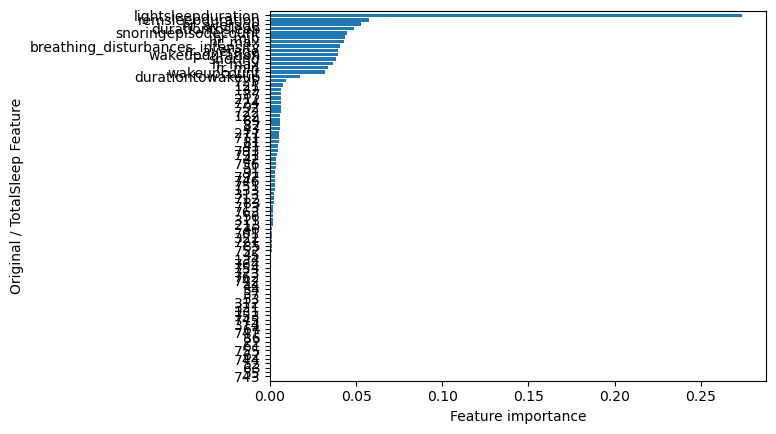

---------------------------------
정확도 :  0.8971428571428571


In [17]:
data=pd.read_csv('2020action-sleep.csv')
data=data.drop('Unnamed: 0',axis=1)
data['total_sleep_time']=data['lightsleepduration']+data['deepsleepduration']+data['remsleepduration'] 
for x in ['wakeupduration','lightsleepduration', 'deepsleepduration', 'wakeupcount','durationtosleep', 'remsleepduration',
       'breathing_disturbances_intensity', 'snoring', 'snoringepisodecount']:
    data[x]=data[x]/data['total_sleep_time']  
data['sleep_classes'] = data['deepsleepduration'].apply(lambda x: 1 if x>=0.2673794848818764 else 0)

col=data.columns[3:-1]
X=data[col]
X=X.drop(['deepsleepduration','total_sleep_time','sleep_score'],axis=1)
X=X.fillna(-1)
X = X.clip(lower=0, upper=1e6)
y=data['sleep_classes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = RandomForestClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
n_features = X_train.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features)[::-1],X_train.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel('Original / TotalSleep Feature')
plt.ylim(-1,n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)


sleep_classes
1    276
0    253
dtype: int64

1. remsleepduration (0.133114)
2. wakeupcount (0.113458)
3. breathing_disturbances_intensity (0.091142)
4. wakeupduration (0.073053)
5. deepsleepduration (0.060242)
6. durationtosleep (0.056134)
7. 725 (0.042795)
8. rr_min (0.040242)
9. snoring (0.037090)
10. hr_min (0.035932)
11. lightsleepduration (0.035602)
12. hr_max (0.033026)
13. rr_max (0.032886)
14. 87 (0.030783)
15. 791 (0.030236)
16. rr_average (0.029955)
17. 724 (0.028362)
18. 133 (0.024683)
19. snoringepisodecount (0.024304)
20. hr_average (0.020403)
21. 751 (0.019189)
22. 132 (0.007368)
23. 56 (0.000000)
24. 55 (0.000000)
25. 54 (0.000000)
26. 53 (0.000000)
27. 57 (0.000000)
28. 52 (0.000000)
29. 51 (0.000000)
30. 46 (0.000000)
31. 81 (0.000000)
32. 44 (0.000000)
33. 82 (0.000000)
34. 45 (0.000000)
35. 312 (0.000000)
36. 43 (0.000000)
37. 22 (0.000000)
38. 122 (0.000000)
39. 131 (0.000000)
40. 134 (0.000000)
41. 211 (0.000000)
42. 212 (0.000000)
43. 213 (0.000000)
44. 311 (0.000000)
45. 42 (0.000000)
46. 84 (0.000000)
47. 

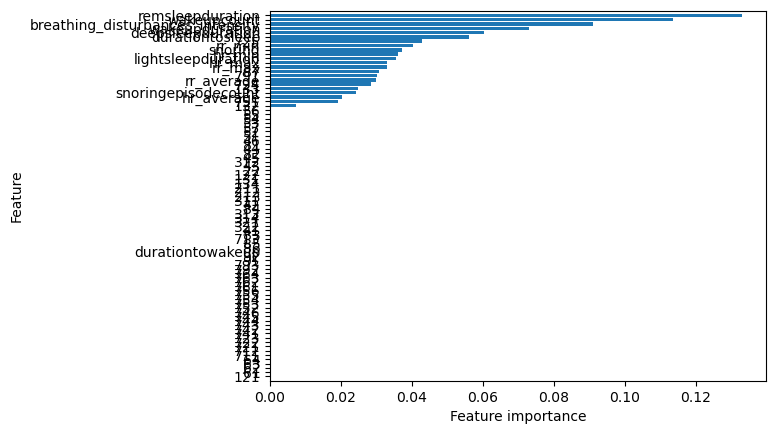

---------------------------------
정확도 :  0.7714285714285715


In [18]:
data=pd.read_csv('2020action-sleep.csv')
data=data.drop('Unnamed: 0',axis=1)
data['total_sleep_time']=data['lightsleepduration']+data['deepsleepduration']+data['remsleepduration']
for x in ['wakeupduration','lightsleepduration', 'deepsleepduration', 'wakeupcount','durationtosleep', 'remsleepduration',
       'breathing_disturbances_intensity', 'snoring', 'snoringepisodecount','sleep_score']:
    data[x]=data[x]/data['total_sleep_time']
data['sleep_classes'] = data['sleep_score'].apply(lambda x: 1 if x>=0.002595014321518081 else 0)
display(data.value_counts('sleep_classes'))
col=data.columns[3:-1]
X=data[col]
X=X.drop(['sleep_score','total_sleep_time'],axis=1)
X=X.fillna(-1)
X = X.clip(lower=0, upper=1e6)
y=data[data.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = XGBClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
n_features = X_train.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features)[::-1],X_train.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)

1. lightsleepduration (0.341425)
2. remsleepduration (0.171715)
3. snoringepisodecount (0.100806)
4. snoring (0.083100)
5. breathing_disturbances_intensity (0.034721)
6. 41 (0.033008)
7. wakeupduration (0.029660)
8. hr_average (0.021304)
9. rr_min (0.019588)
10. hr_max (0.019087)
11. hr_min (0.018459)
12. 132 (0.018124)
13. durationtosleep (0.017416)
14. 121 (0.016608)
15. 711 (0.016432)
16. rr_max (0.015906)
17. 722 (0.013302)
18. wakeupcount (0.010739)
19. durationtowakeup (0.009852)
20. rr_average (0.007249)
21. 51 (0.001498)
22. 57 (0.000000)
23. 56 (0.000000)
24. 55 (0.000000)
25. 81 (0.000000)
26. 43 (0.000000)
27. 54 (0.000000)
28. 53 (0.000000)
29. 82 (0.000000)
30. 52 (0.000000)
31. 46 (0.000000)
32. 45 (0.000000)
33. 44 (0.000000)
34. 42 (0.000000)
35. 84 (0.000000)
36. 322 (0.000000)
37. 321 (0.000000)
38. 314 (0.000000)
39. 313 (0.000000)
40. 312 (0.000000)
41. 311 (0.000000)
42. 22 (0.000000)
43. 213 (0.000000)
44. 212 (0.000000)
45. 211 (0.000000)
46. 134 (0.000000)
47. 1

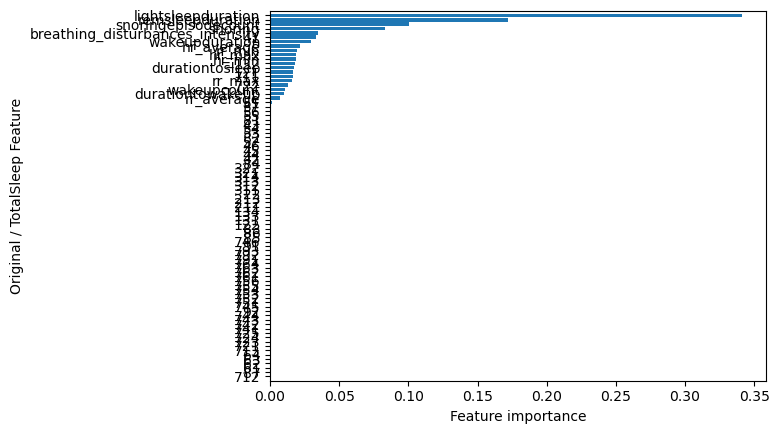

---------------------------------
정확도 :  0.9428571428571428


In [19]:
data=pd.read_csv('2020action-sleep.csv')
data=data.drop('Unnamed: 0',axis=1)
data['total_sleep_time']=data['lightsleepduration']+data['deepsleepduration']+data['remsleepduration'] 
for x in ['wakeupduration','lightsleepduration', 'deepsleepduration', 'wakeupcount','durationtosleep', 'remsleepduration',
       'breathing_disturbances_intensity', 'snoring', 'snoringepisodecount']:
    data[x]=data[x]/data['total_sleep_time']  
data['sleep_classes'] = data['deepsleepduration'].apply(lambda x: 1 if x>=0.2673794848818764 else 0)

col=data.columns[3:-1]
X=data[col]
X=X.drop(['deepsleepduration','total_sleep_time','sleep_score'],axis=1)
X=X.fillna(-1)
X = X.clip(lower=0, upper=1e6)
y=data['sleep_classes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = XGBClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
n_features = X_train.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features)[::-1],X_train.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel('Original / TotalSleep Feature')
plt.ylim(-1,n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)
